In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: right;"> &#9989; Rupita Tahsin

---
# __Ordinary Differential Equation 2: In-Class__


<img src="https://cdn.pixabay.com/photo/2016/06/14/15/46/cat-1456878_1280.png" width=75%>

Image from [pixabay](https://pixabay.com/)

# Learning objectives

At the end of the exercise, you should be able to:
- Implement an ODE model based on equations.
- Find better parameters using grid search.
- Use input arguments in your program.

# Outline

1. [Review pre-class Assignment](#Review_pre-class_assignment)
1. [ODE Parameter Fitting](#ODE_Parameter_Fitting)
1. [Timing Brute Force Search](#Timing_Brute_force_search)


----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

----
<a name="ODE_Parameter_Fitting"></a>

# 2. ODE Parameter fitting

## 2.1 Predator-prey data

The following example example data comes from a [StackExchange post](https://mathematica.stackexchange.com/questions/34761/find-parameters-of-odes-to-fit-solution-data) that have three columns: ```time```, ```x``` and ```y``` where `x` and `y` resemble prey numbers and predator numbers, respectively.

&#9989; **<font color=blue>DO THIS:</font>** Run the following code to read the data.

In [1]:
# (* The first column is time 't', the second column is coordinate 'x', and the last column is coordinate 'y'. *)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data_prey_predator.csv", index_col=0)
print(data.shape)
print(data.head())
data['Pray']

(90, 3)
   Time   Pray  Predator
0    11  45.79     41.40
1    12  53.03     38.90
2    13  64.05     36.78
3    14  75.40     36.04
4    15  90.36     33.78


0     45.79
1     53.03
2     64.05
3     75.40
4     90.36
      ...  
85     9.51
86     8.69
87     9.53
88     8.68
89    10.82
Name: Pray, Length: 90, dtype: float64

&#9989; **<font color=blue>DO THIS:</font>** Complete the following code to plot the data.

In [2]:
data = np.array(data)

### YOUR CODES HERE
t = data[:,0]  # <-- fill in here
x =  data[:,1] # <-- fill in here
y =  data[:,2] # <-- fill in here

plt.scatter(t,x)
plt.scatter(t,y)
plt.legend(('prey', 'preditor'))
plt.xlabel('Time'); plt.ylabel('Number of individuals')
plt.title('Population');

## 2.2 Implement Lotka-Volterra equations

This data seems to fit the classic Lotka-Volterra Predator-prey:

$$\dot{x} = \alpha x - \beta xy$$
$$\dot{y} = -\gamma y + \delta xy$$

https://en.wikipedia.org/wiki/Lotka–Volterra_equations

&#9989; **<font color=blue>DO THIS:</font>**  These equations can be representied by an ODE function. Note that here we are not implementing an approximation using methods like finite difference. Instead, we will be using the ODE solver `odeint` from `scipy`. Complete the following code in the `### YOUR CODE HERE` comment below to include the equation.

In [4]:
from scipy.integrate import odeint

# The above ODE model sutiable for ODEINT
def deriv(position,t,a,b,c,d):
    x = position[0]
    y = position[1]
    
    ### YOUR CODES HERE
    dx = a*x-b*x*y  # <-- Fill in here
    dy = -c*y+d*x*y  # <-- Fill in here
    
    return (dx,dy)

# Initial conditions vector
x0 = data[0,1] # the 1st x value
y0 = data[0,2] # the 1st y value

#Time Vector 
t = data[:,0]

## 2.3 Parameters for the equation

The tricky thing is that we don't know the values for ```a, b, c,``` and ```d``` ($\alpha, \beta, \gamma, \delta$). 

&#9989; **<font color=blue>DO THIS:</font>**  Let's say we know that variables ```a, c``` are in the range [0, 1] and ```b, d``` are in the range [0, 0.01].  Here is a guess that works okay. Run the following code to see how well the result fit the original data.

In [5]:
a = 0.2
b = 0.001
c = 0.1
d = 0.001

In [6]:
# Integrate equations over the time grid, t. and pplot the result
ret=None
def plot_original_and_model(data, a, b, c, d, t):
    global ret
    x0 = data[0,1] # the 1st x value
    y0 = data[0,2] # the 1st y value
    
    ret = odeint(deriv, (x0, y0), t, args=(a,b,c,d))

    #Plot the model on the data
    plt.figure(figsize=(5,4))
    plt.plot(t,ret)
    plt.scatter(t, data[:,1])
    plt.scatter(t, data[:,2]);
    plt.legend(('x est', 'y est', 'x', 'y'))
    plt.xlabel('Time'); plt.ylabel('Number of individuals')
    plt.show()

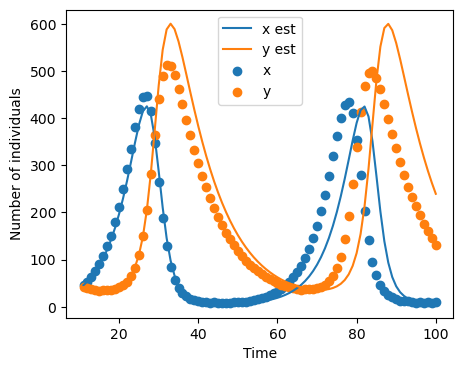

In [7]:
plot_original_and_model(data, a, b, c, d, t)

## 2.4 Error measure

Eyeballing a graph is fine but it is generally better to use some for of measureable error:

In [8]:
def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))

In [9]:
rmse(data[:,1], ret[:,0])**2+ rmse(data[:,2], ret[:,1])**2

14782.607376560944

&#9989; **<font color=blue>DO THIS:</font>** Modifiy ```a,b,c,d``` above and find a better fit for the model. In the cell below:

- Put your parameters below
- Integrate equations with new parameters over the time grid, t. 
- print out the rmse.

In [10]:
# Your code here
a = 0.22
b = .0013
c = .1
d = .001


ret = odeint(deriv, (x0, y0), t, args=(a,b,c,d))
rmse(data[:,1], ret[:,0])**2+ rmse(data[:,2], ret[:,1])**2


812.393637042104

---
<a name="Timing_Brute_force_search"></a>

# 3. Timing Brute Force Search

## 3.1 Grid search

Here we tried to search for the best parameters by setting up a grid with 5 possible values for each parameters. So there are totally $5^4=625$ steps to search for.

In [11]:
# In case you don't have tqdm
!pip install tqdm

&#9989; **<font color=blue>DO THIS:</font>** Now let's try to solve the problem using brute force approach. Below is a function that will do grid search on the parameter `a` and plot rmse values over itereations. 


- Extend the code to include grid searches on `b,c,d`
- Provide DocStrings including the role of this functions, info on arguments (e.g., data, its datatype and description), output of the function, and the objects returned.
- Comment on the parts you consider important.

  0%|          | 0/100 [00:00<?, ?it/s]

Current best: a =1.9393939393939394
             rmse=94109.15048388584


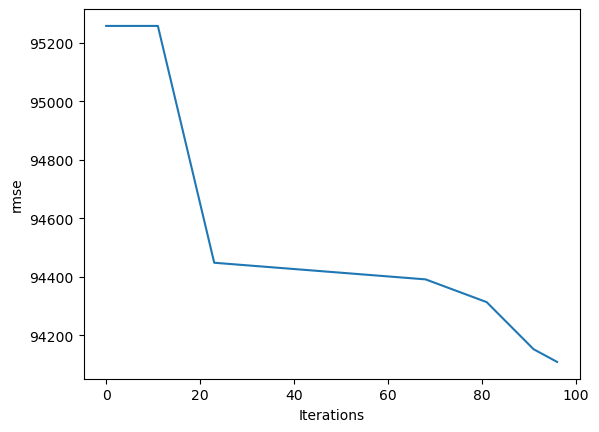

1.9393939393939394

In [13]:
from tqdm.notebook import tqdm

def grid_search_and_plot_rmse(data, parameter_a, other_parameters, num_samples):
    """
    given the range for parameter a, the function returns the least possible error for a, when b,c,d are constant.
    """
    
    minerr = 9999999
    min_a = parameter_a[0] #define range of a
    max_a = parameter_a[1]

    best_a= min_a
    t = data[:,0]
    
    err_list = []
    n_iter   = 0
    for a in tqdm(np.linspace(min_a, max_a, num_samples)): #for each possible value of a
                    ret = odeint(deriv, (x0,y0), t, args=(a,other_parameters[0],other_parameters[1],other_parameters[2]))
                    err = rmse(data[:,1], ret[:,0])**2 + rmse(data[:,2], ret[:,1])**2 #find error
                    if err < minerr:
                        minerr = err
                        err_list.append([n_iter,err])
                        best_a = a
                    n_iter += 1

    print(f"Current best: a ={best_a}")
    print(f"             rmse={minerr}")

    # Plot how the rmse reduce over iterations
    err_list = np.array(err_list)
    plt.plot(err_list[:,0], err_list[:,1])
    plt.xlabel("Iterations"); plt.ylabel("rmse")
    plt.show()
    
    return best_a

grid_search_and_plot_rmse(data, [0,2], [1,1,1], 100)

In [16]:
def grid_search_and_plot_rmse(data, parameters, num_samples):
    minerr = 9999999

    best= None
    t = data[:,0]

    err_list = []
    n_iter   = 0
    for a in tqdm(np.linspace(parameters[0][0], parameters[1][0], num_samples)):
        for b in np.linspace(parameters[0][1], parameters[1][1], num_samples):
            for c in np.linspace(parameters[0][2], parameters[1][2], num_samples):
                for d in np.linspace(parameters[0][3], parameters[1][3], num_samples):               
                    ret = odeint(deriv, (x0,y0), t, args=(a,b,c,d))
                    err = rmse(data[:,1], ret[:,0])**2 + rmse(data[:,2], ret[:,1])**2
                    if err < minerr:
                        minerr = err
                        err_list.append([n_iter,err])
                        best = (a,b,c,d)
                    n_iter += 1

    print(f"Current best: a ={best}")
    print(f"             rmse={minerr}")

    # Plot how the rmse reduce over iterations
    err_list = np.array(err_list)
    plt.plot(err_list[:,0], err_list[:,1])
    plt.xlabel("Iterations"); plt.ylabel("rmse")
    plt.show()

&#9989; **<font color=blue>DO THIS:</font>** Provide code below that will call the modified `grid_search_and_plot_rmse` by specifying:

1. `data`: This is the data object we have alrady created.
2. `parameters`: A nested list that looks like:

```Python
[[min_a, min_b, min_c, min_d],
 [max_a, max_b, max_c, max_d]]
```
Based on what your best guess earlier, come up min/max values for `a`, `b`, `c`, and `d` and construct the `parameters` list.

3. `num_samples`: Number of samples to get between min and max value you set for each parameter. Set this to 5 for now.

  0%|          | 0/10 [00:00<?, ?it/s]

Current best: a =(0.2088888888888889, 0.0011888888888888889, 0.11111111111111112, 0.0008888888888888889)
             rmse=1263.539653808169


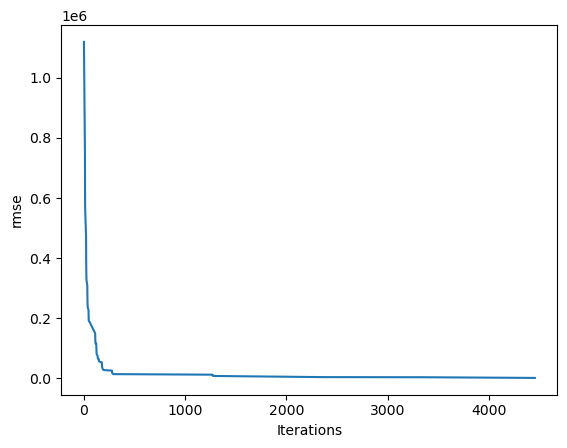

In [17]:
# put your code here
#our best values
a = 0.22
b = .0013
c = .1
d = .001

parameters = [
    [a-.1, b-.001, c-.1, d-.001],
    [a+.1, b+.001, c+.1, d+.001]
]

num_samples = 10

grid_search_and_plot_rmse(data, parameters, num_samples)

&#9989; **<font color=blue>DO THIS:</font>** Write code and plot the model against real data with the current best parameters.

## 3.2 Implement a stand-alone application with input arguments

Above we have figure out how to model predator-prey relationships and use brute-force method to find the parameters.

&#9989; **<font color=blue>DO THIS:</font>** Create a `predator_prey.py` file that will:

- Use the `ArgParse` module to take input arguments (all required) including:
  - `data`: name of the data file
  - `parameters`: With 8 floating point values.that look like:
    - `'[[min_a, min_b, min_c, min_d],[max_a, max_b, max_c, max_d]]'`
    - If this is passed as a string, you can use `eval(parameters)` to turn this into a list.
  - `num_samples`: specify the number of samples for each parameters.
- Use the arguments to run `grid_search_and_plot_rmse` and print out current best parameters and rmse.

Put your .py code below.

In [ ]:
# put your code here
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('data', type=str,help='Name of data file')
parser.add_argument('parameters', type=str,help='values of parameters')
parser.add_argument('num_samples', type=int,help='the number of samples for each parameters.')

args = parser.parse_args()

data = np.load(args.data)
parameters = eval(args.parameters)

grid_search_and_plot_rmse(data,parameters, args.num_samples)

-----
### Congratulations, we're done!